In [ ]:
# Plot market bids/asks

Text(0.5, 1.0, 'Time series for market 1 / trader 4')

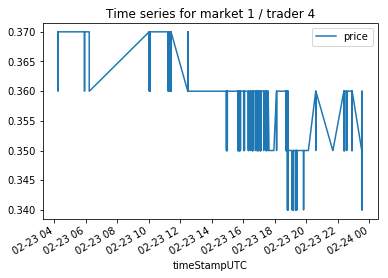

In [67]:
import requests
import json
import numpy as np
import pandas as pd
import time

%matplotlib inline
import matplotlib.pyplot as plt

baseurl = 'http://127.0.0.1:7000/'
tId = 4
mkId  = 1
headers = {'content-type': 'application/json'}

# Get summary for this market and plot

url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)
a = pd.read_json(response.json())
a = a[a['marketId'] == mkId]
a = a.set_index(a['timeStampUTC'])
a = a[3:]


plt.figure(); a['price'].plot(); plt.legend(loc='best'); plt.title('Time series for market ' + str(mkId) + ' / trader ' +str(tId))


In [68]:
bids = a[a['quantity']<0]
asks = a[a['quantity']>0]\

Text(0.5, 1.0, 'Time series for market 1 / trader 4')

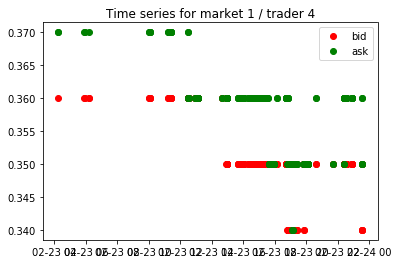

In [69]:
plt.figure(); 
plt.plot(bids['timeStampUTC'],bids['price'], 'ro');
plt.plot(asks['timeStampUTC'],asks['price'], 'go');
plt.legend(('bid', 'ask')); plt.title('Time series for market ' + str(mkId) + ' / trader ' +str(tId))
